## Human Activity Recognition from accelerometer data

Note: Using LightGBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
datafolder='Activity_Recognition_from Single_Chest-Mounted_Accelerometer/'
person={}
for i in range(15):
    person[i+1]= pd.read_csv(datafolder+str(i+1)+'.csv',index_col=0,names=['seq num', 'ax', 'ay', 'az', 'label']) 

In [3]:
for i in person:
    print(i,'shape:',person[i].shape)#,'columns:',person[i].columns)

1 shape: (162501, 4)
2 shape: (138001, 4)
3 shape: (102341, 4)
4 shape: (122201, 4)
5 shape: (160001, 4)
6 shape: (140901, 4)
7 shape: (163001, 4)
8 shape: (138001, 4)
9 shape: (166741, 4)
10 shape: (126801, 4)
11 shape: (104451, 4)
12 shape: (114702, 4)
13 shape: (67651, 4)
14 shape: (116101, 4)
15 shape: (103501, 4)


In [4]:
class_dict={}
class_dict[1]='Working at Computer'
class_dict[2]='Standing Up, Walking and Going Up/Down stairs' 
class_dict[3]='Standing'
class_dict[4]='Walking'
class_dict[5]='Going Up/Down Stairs'
class_dict[6]='Walking and Talking with Someone'
class_dict[7]='Talking while Standing'

In [5]:
person[7].head()

,ax,ay,az,label
seq num,,,,
0.0,1892,2279,1781,1
1.0,1895,2283,1785,1
2.0,1889,2279,1794,1
3.0,1892,2276,1794,1
4.0,1892,2280,1787,1


In [6]:
#after 100000 the time step does not increment by 1?
person[1].iloc[99997:100003]

,ax,ay,az,label
seq num,,,,
99997.0,1912,2386,1993,7
99998.0,1913,2379,1997,7
99999.0,1914,2386,1993,7
100000.0,1914,2383,1987,7
100000.0,1911,2384,1990,7
100000.0,1913,2385,1993,7


In [7]:
#there are entries with invalid class=0
person[2][person[2]['label']==0].head()

,ax,ay,az,label
seq num,,,,
104300.0,2143,2339,1959,0
104300.0,2146,2341,1960,0
104300.0,2144,2338,1959,0
104300.0,2145,2340,1964,0
104300.0,2145,2340,1957,0


In [8]:
def plot_data(folder='raw'):
    os.system('mkdir -p plots/'+folder)
    for i in person:

        fig, ax = plt.subplots(4,1, figsize=(6.4*1.5,4.8*1.5),sharex='col') 

        ax[0].plot(person[i]['ax'])
        ax[0].set_ylabel('ax')

        ax[1].plot(person[i]['ay'])
        ax[1].set_ylabel('ay')

        ax[2].plot(person[i]['az'])
        ax[2].set_ylabel('az')

        ax[3].plot(person[i]['label'])
        ax[3].set_ylabel('label')

        fig.suptitle('person '+str(i))

        fig.savefig('plots/'+folder+'/'+'person'+str(i))
        
        
def normalize_data(dataset):
    dataset = dataset - dataset.mean()
    dataset = dataset/dataset.std()
    return dataset


def get_data_per_class_per_person():
    #separate data into classes 
    #act := act[class type][person number]
    act = {}
    for i in range(1,8):
        act[i] = {}
        for j in person:
            act[i][j] = person[j][person[j]['label']==i]

    return act


def plot_per_class_per_person(act):
    folder = 'separate_class'
    os.system('mkdir -pv plots/'+folder)
    for c in range(1,8):

        for i in person:

            fig, ax = plt.subplots(3,1, figsize=(6.4*2,4.8*1.5),sharex='col') 

            ax[0].plot(act[c][i]['ax'],'.')
            ax[0].set_ylabel('ax')

            ax[1].plot(act[c][i]['ay'],'.')
            ax[1].set_ylabel('ay')

            ax[2].plot(act[c][i]['az'],'.')
            ax[2].set_ylabel('az')

            fig.suptitle('person '+str(i)+': '+class_dict[c])

            fig.savefig('plots/'+folder+'/'+'act_'+str(c)+'_person '+str(i))

            if i > 3:
                fig.clf()



/anaconda2/envs/activity_recognition/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


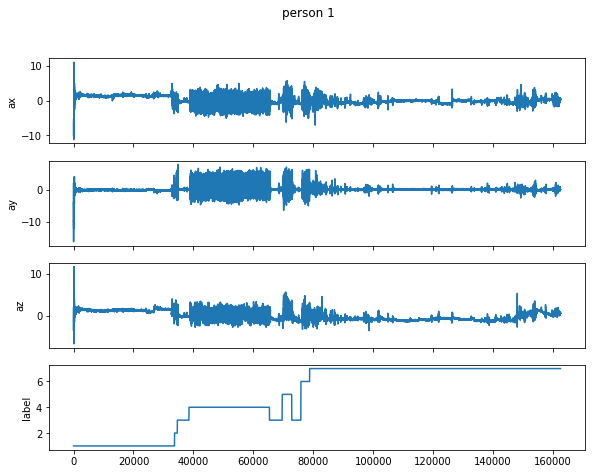

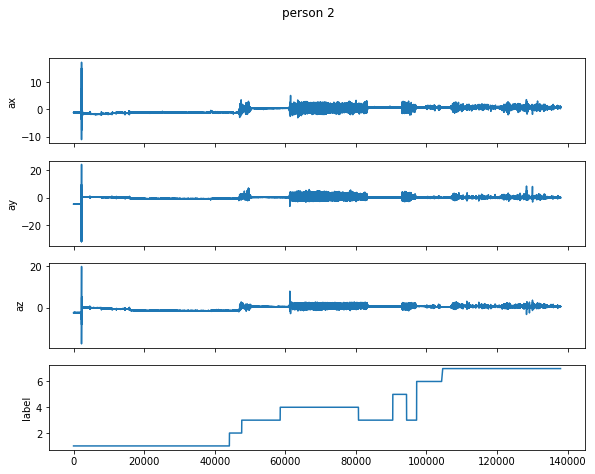

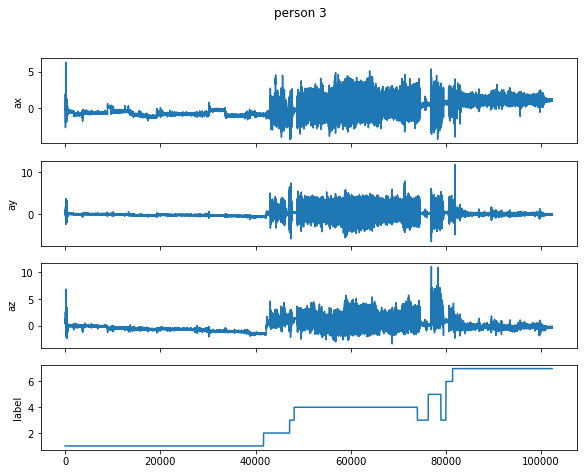

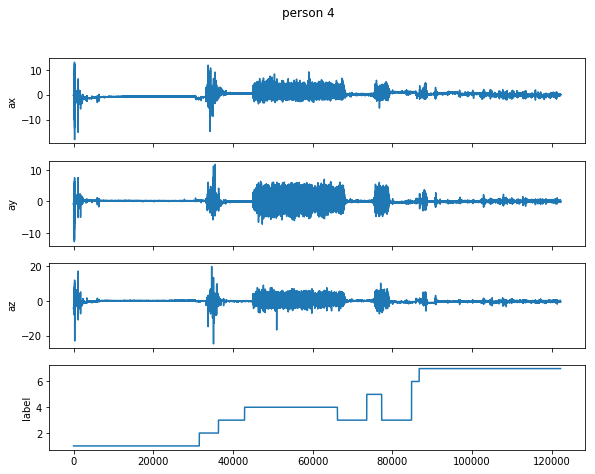

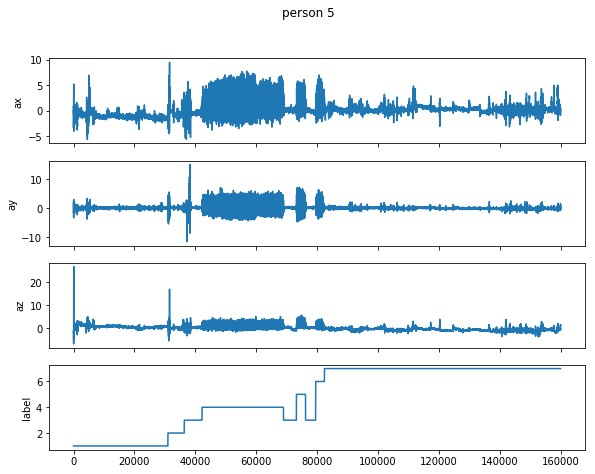

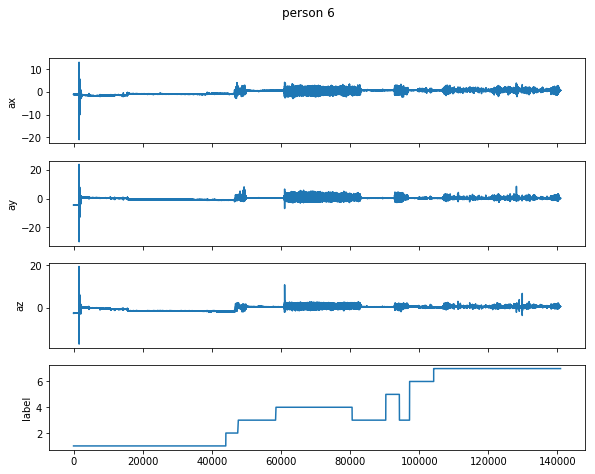

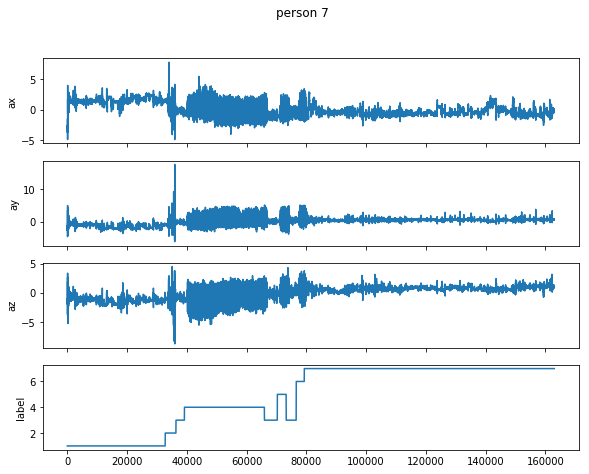

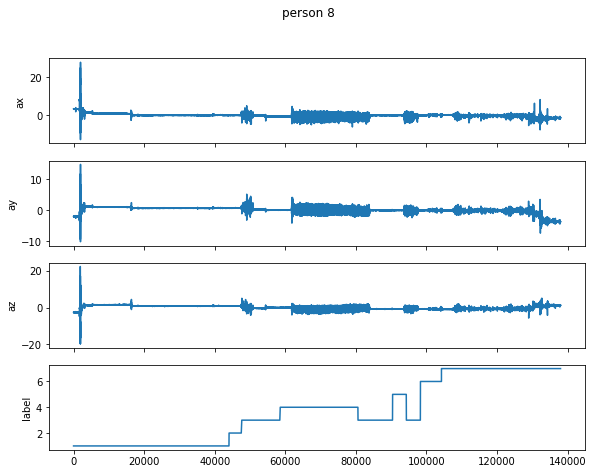

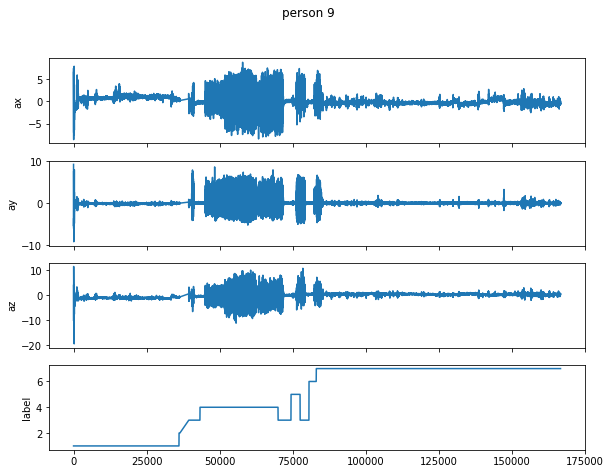

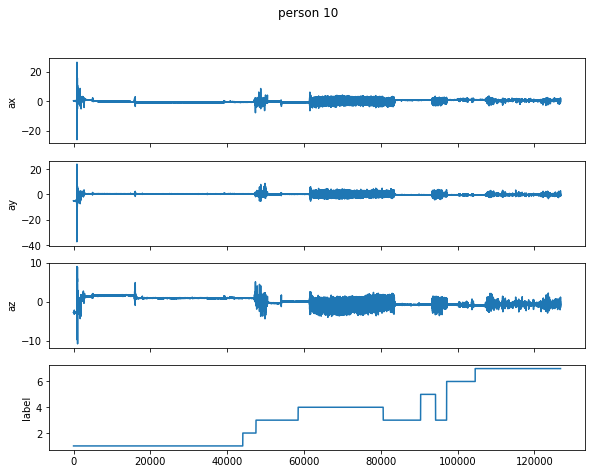

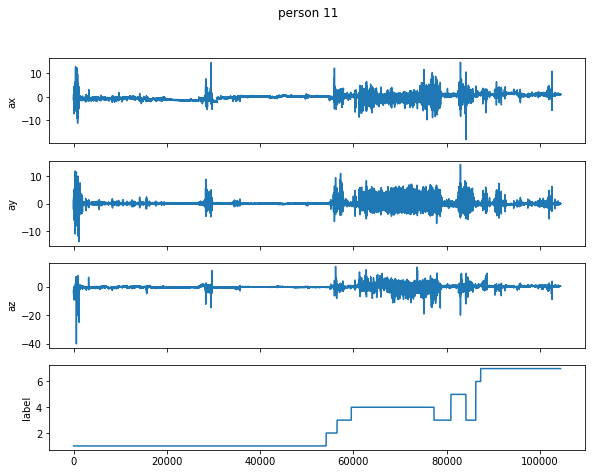

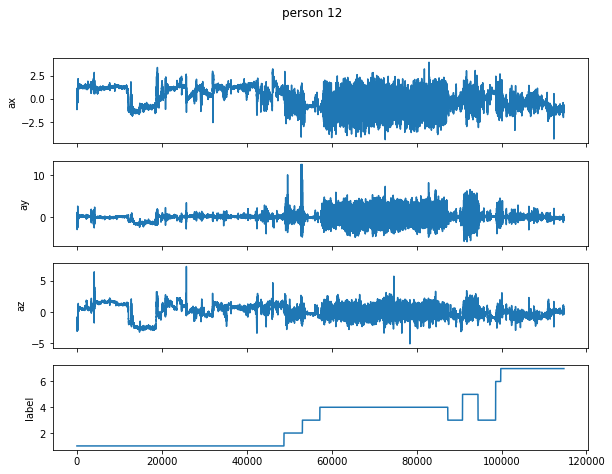

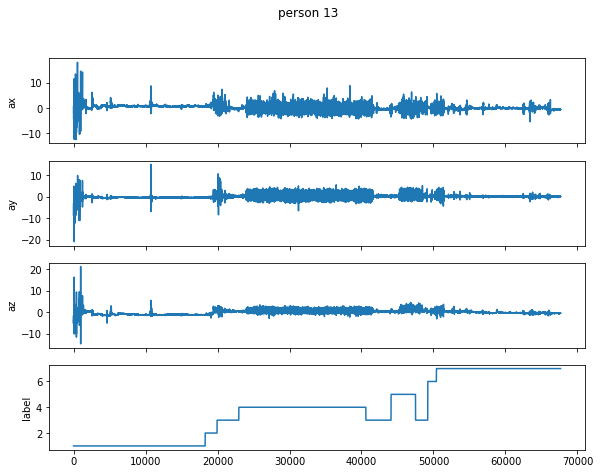

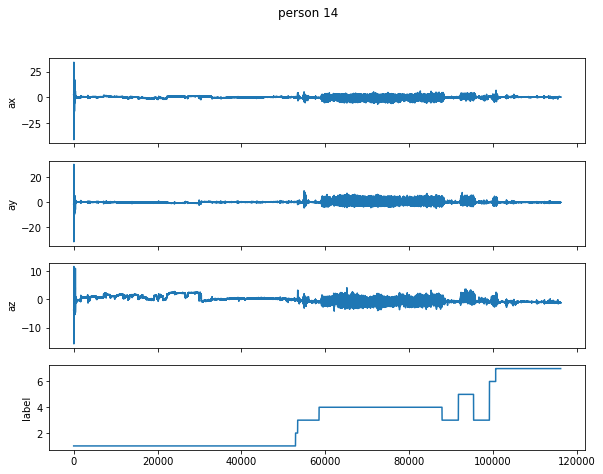

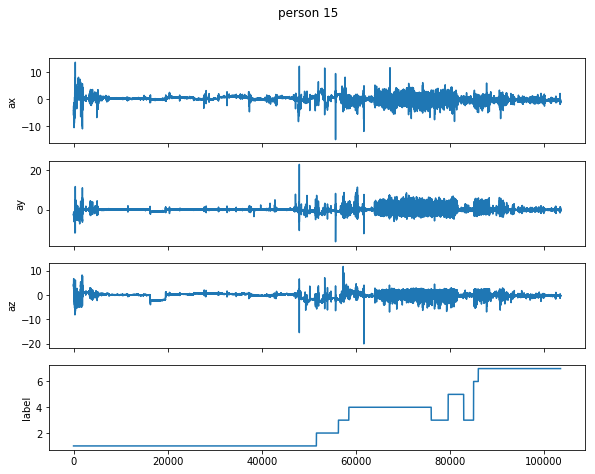

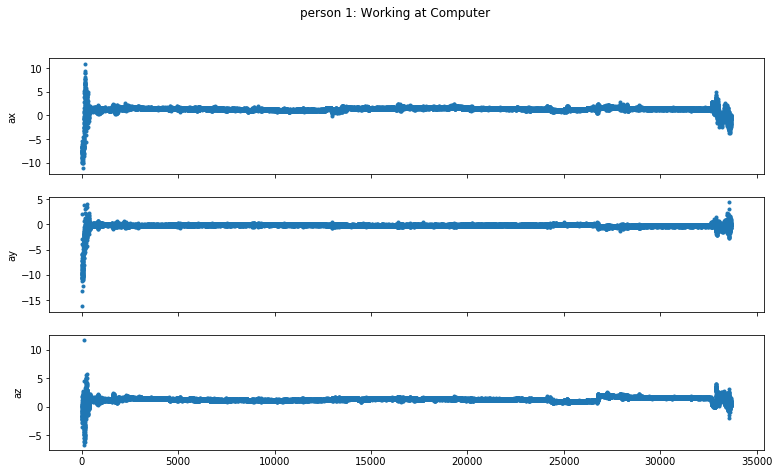

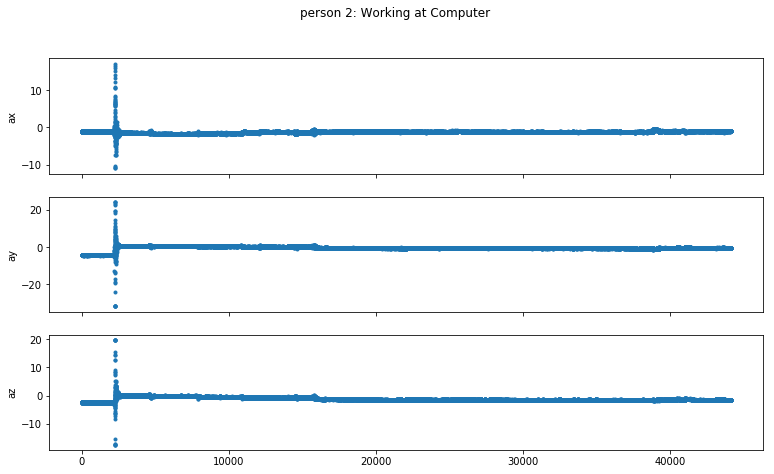

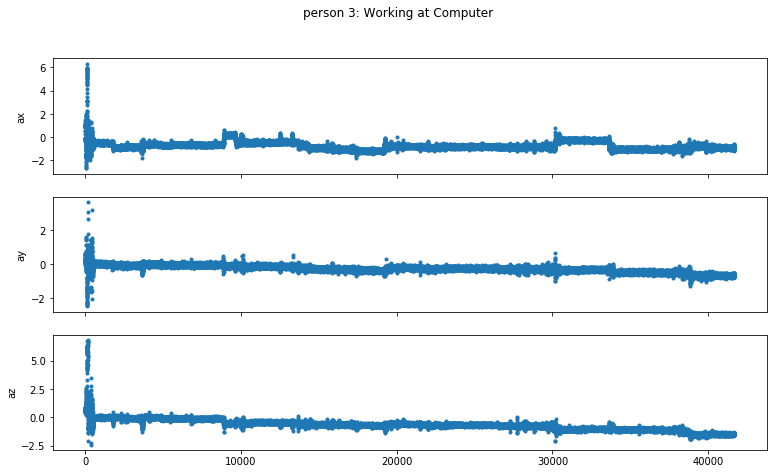

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

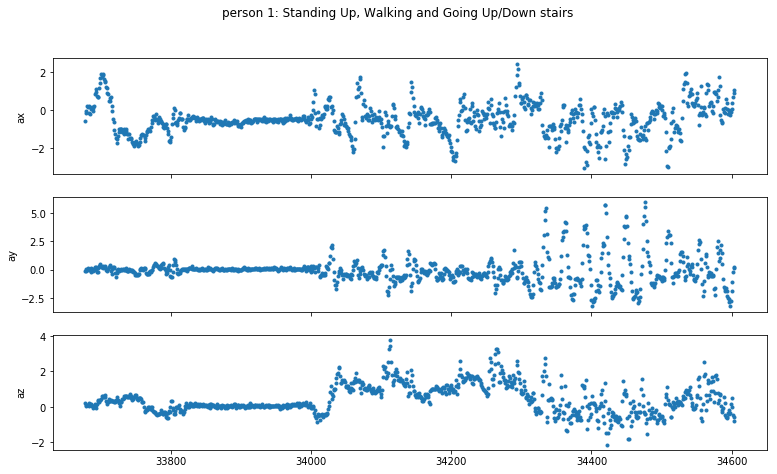

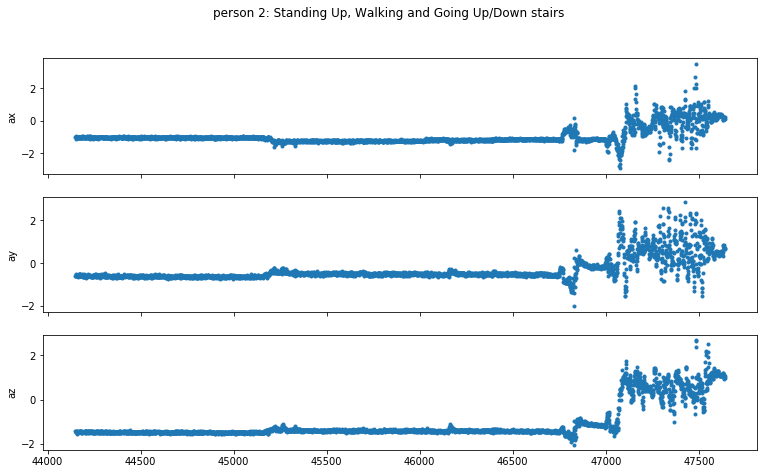

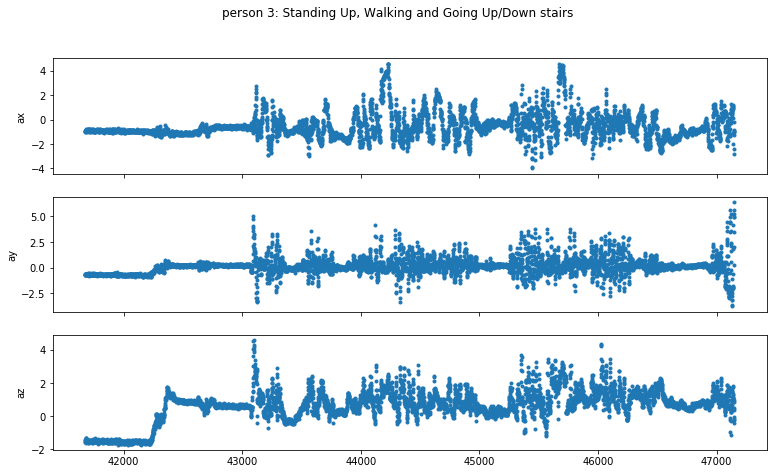

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

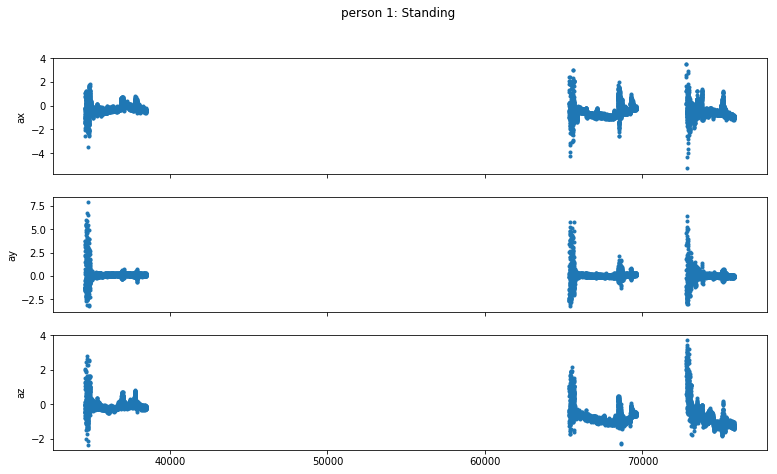

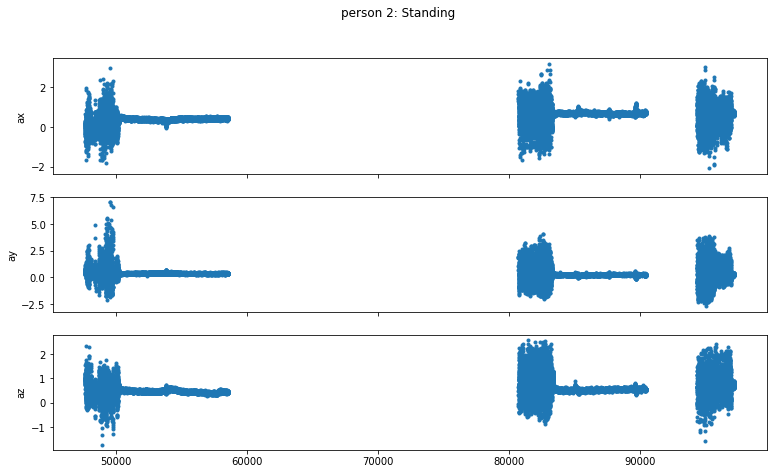

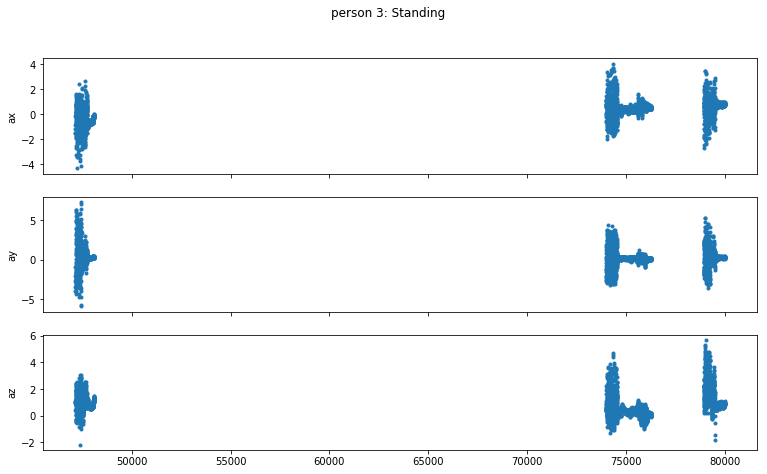

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

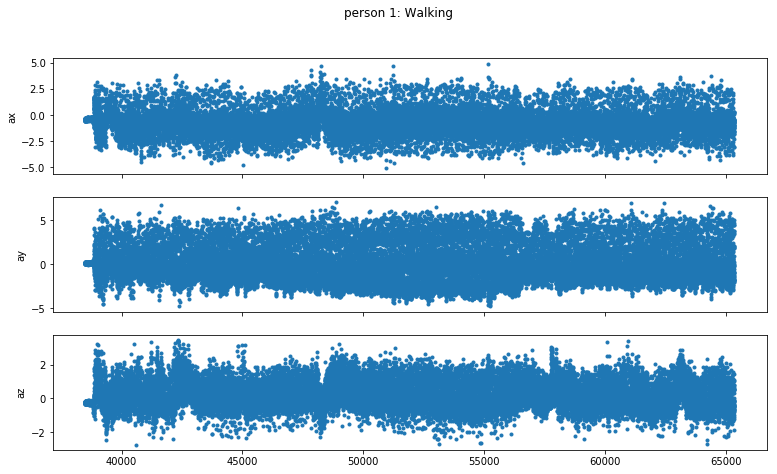

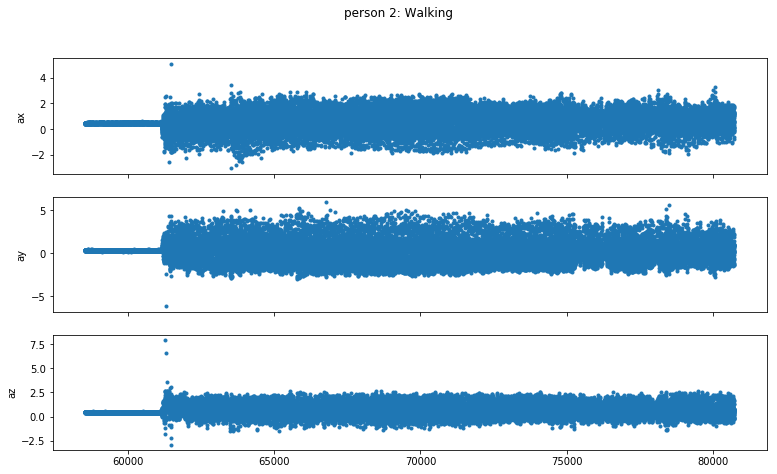

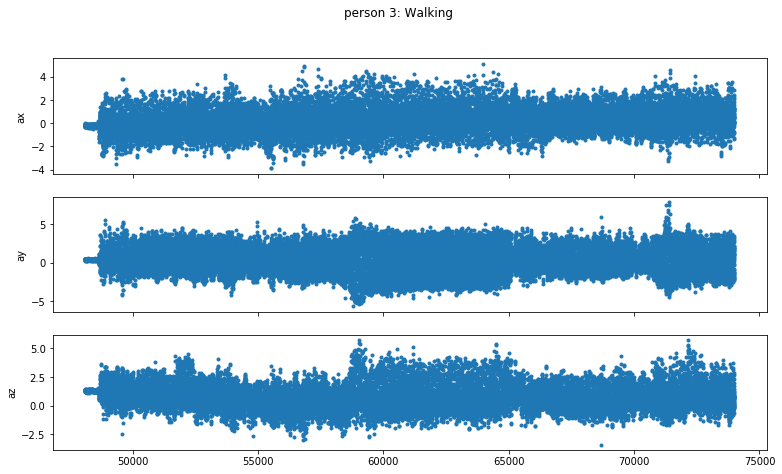

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

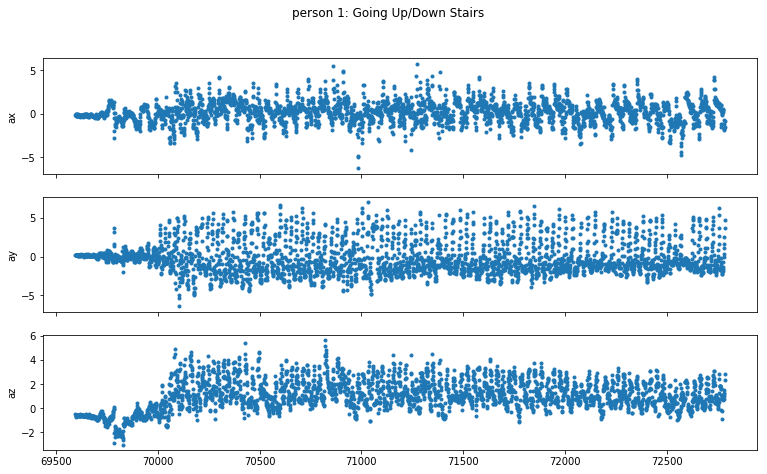

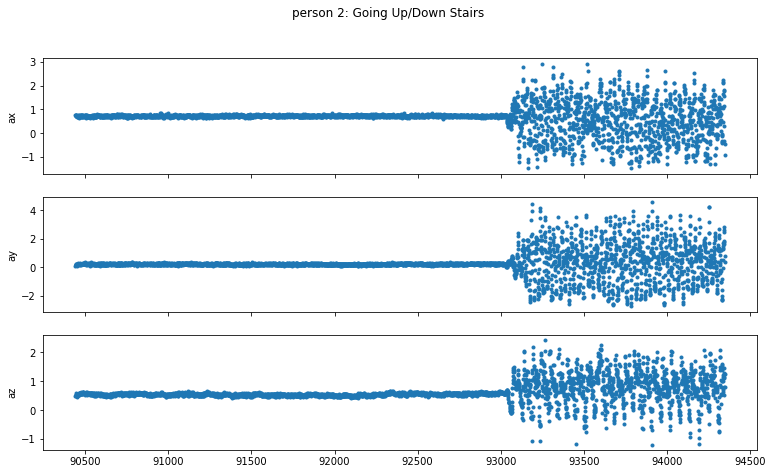

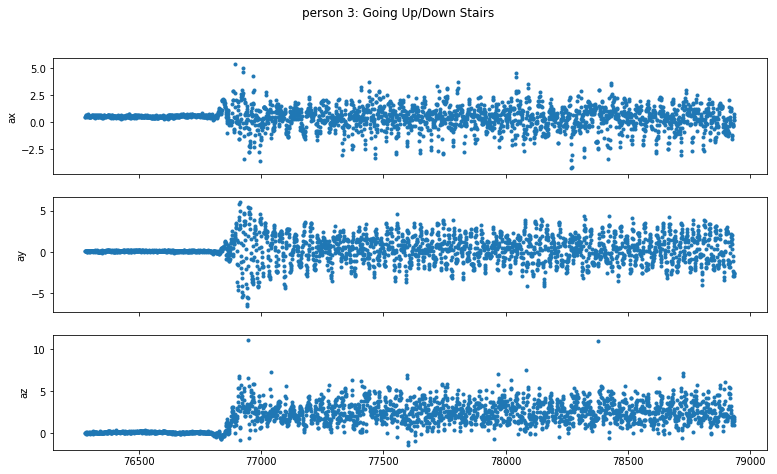

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

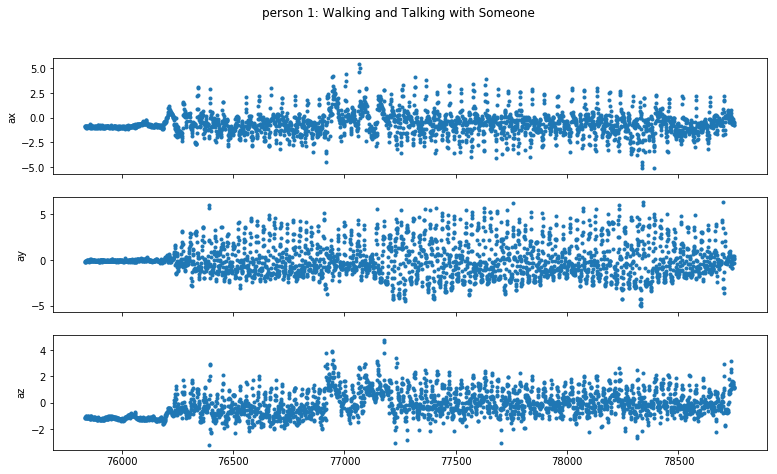

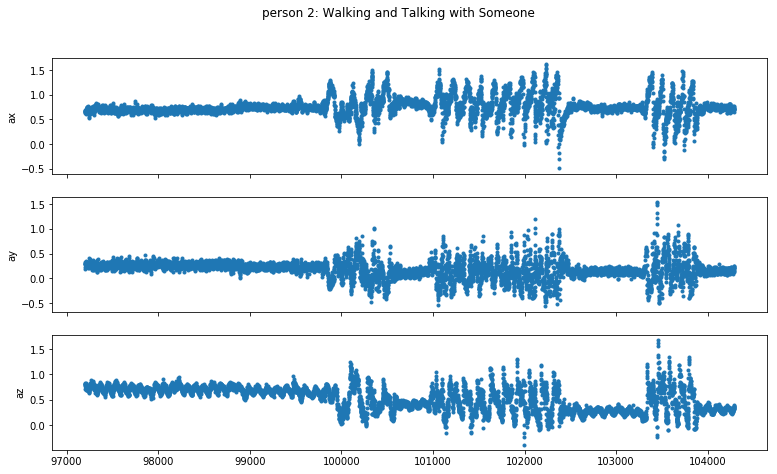

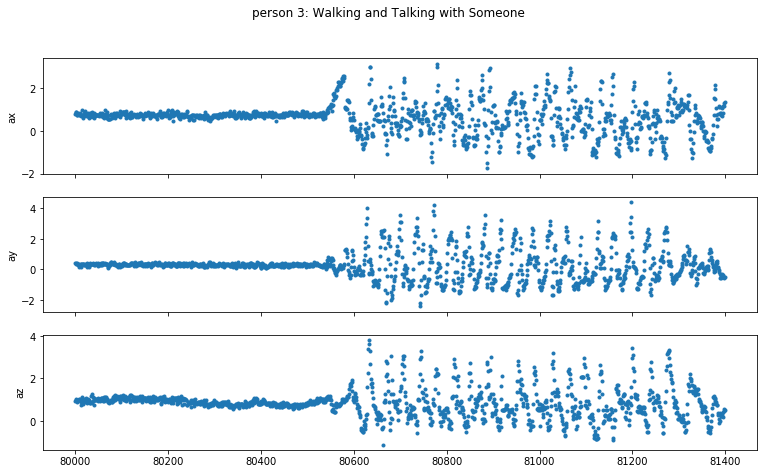

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

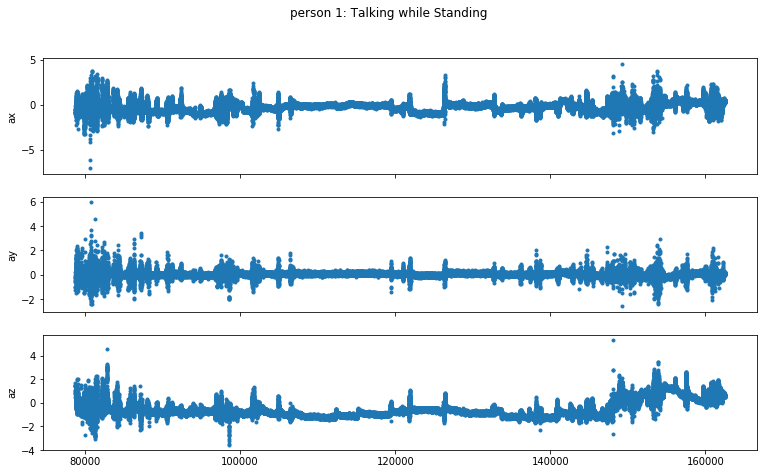

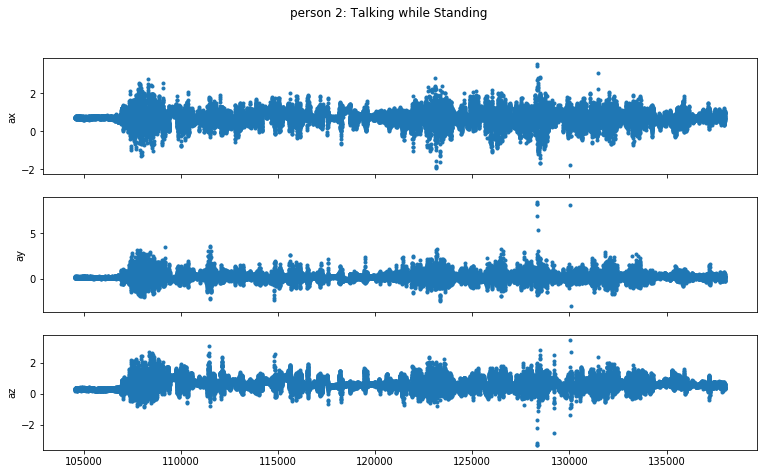

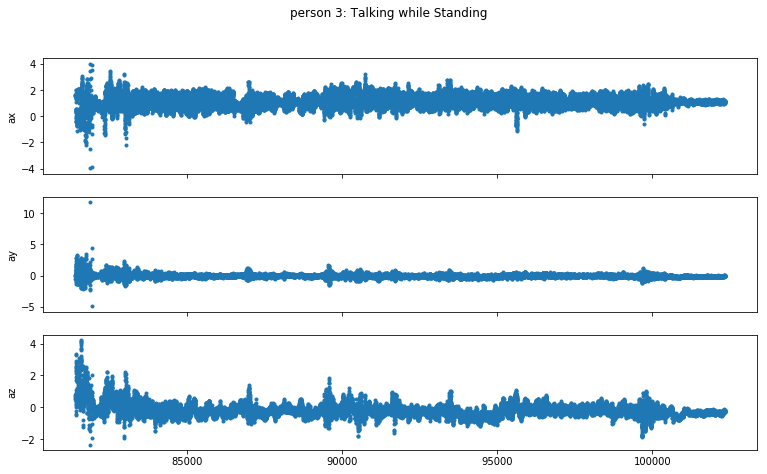

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

<Figure size 921.6x518.4 with 0 Axes>

In [9]:
#plot_data('raw')

# Remove entries with label=0
for i in person:
    index_to_drop = person[i][person[i]['label']==0].index
    person[i] = person[i].drop(index_to_drop)

# normalize data
for i in person: 
    for col in ['ax','ay','az']:
        person[i][col] = normalize_data(person[i][col])

plot_data('normalized')

act = get_data_per_class_per_person()

plot_per_class_per_person(act)

In [10]:
###FEATURE ENGINEERING

def add_features(window=52 * 3):

    print('using window of',window)

    #Add rolling mean
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_MA'+str(window)] = person[i][col].rolling(window).mean()

    #Add rolling std
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_stdA'+str(window)] = person[i][col].rolling(window).std()

    #Add rolling sum
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_sumA'+str(window)] = person[i][col].rolling(window).sum()

    #Add rolling max
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_maxA'+str(window)] = person[i][col].rolling(window).max()

    #Add rolling min
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_minA'+str(window)] = person[i][col].rolling(window).min()

    #Add rolling median
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_medA'+str(window)] = person[i][col].rolling(window).median()

    #Add rolling covariance
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_covA'+str(window)] = person[i][col].rolling(window).cov()

    #Add rolling kurtosis
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_kurtA'+str(window)] = person[i][col].rolling(window).kurt()

    #Add rolling skew
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_skewA'+str(window)] = person[i][col].rolling(window).skew()    

    #Add magnitude of total acc vector sqrt(ax^2+ay^2+az^2)
    for i in person:
        person[i]['mag_a'] = np.sqrt (person[i]['ax']**2 + person[i]['ay']**2 + person[i]['az']**2)

    #Add rolling mean of magnitude of total acc 
    for i in person:
        person[i]['mag_a_MA'] = person[i]['mag_a'].rolling(window).mean()

    #Add rolling sum of magnitude of total acc 
    for i in person:
        person[i]['mag_a_MA'] = person[i]['mag_a'].rolling(window).sum()

    #Add rolling std of magnitude of total acc 
    for i in person:
        person[i]['mag_a_MA'] = person[i]['mag_a'].rolling(window).std()

    #Add angle
    for i in person:
        for col in ['ax','ay','az']:
            person[i]['phi_'+col] = np.arccos( person[i][col] / person[i]['mag_a'] )   

    #Add difference between time steps 
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_diff'] = person[i][col].diff()

    #Add rolling mean of difference between time steps 
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_diff_MA'] = person[i][col+'_diff'].rolling(window).mean()

In [11]:
add_features()

using window of 156


In [12]:
person[7][52*5:52*5+10]

,ax,ay,az,label,ax_MA156,ay_MA156,az_MA156,ax_stdA156,ay_stdA156,az_stdA156,...,mag_a_MA,phi_ax,phi_ay,phi_az,ax_diff,ay_diff,az_diff,ax_diff_MA,ay_diff_MA,az_diff_MA
seq num,,,,,,,,,,,,,,,,,,,,,
260.0,1.032492,-1.743582,-1.816741,1,0.216126,-0.573870,-0.938599,0.989788,1.508169,1.496666,...,1.162444,1.181669,2.266160,2.301705,0.524747,-0.309087,0.130716,0.023733,-0.007717,-0.014989
261.0,0.872153,-1.938795,-1.845789,1,0.250231,-0.618294,-0.971651,0.917019,1.443883,1.458681,...,1.086913,1.255836,2.330405,2.285777,-0.160339,-0.195213,-0.029048,0.034105,-0.044423,-0.033051
262.0,0.420288,-1.515834,-1.642453,1,0.277514,-0.659902,-1.003771,0.855943,1.373468,1.417074,...,1.014535,1.384922,2.300342,2.377784,-0.451866,0.422961,0.203336,0.027284,-0.041608,-0.032120
263.0,0.085032,-0.865125,-1.264830,1,0.296015,-0.677734,-1.028629,0.819381,1.357769,1.386910,...,1.002920,1.515363,2.169643,2.539454,-0.335255,0.650709,0.377623,0.018501,-0.017832,-0.024858
264.0,0.391135,-0.881393,-1.453642,1,0.304425,-0.683156,-1.052929,0.813524,1.356876,1.360516,...,1.003457,1.344650,2.100493,2.555886,0.306102,-0.016268,-0.188812,0.008409,-0.005423,-0.024300
265.0,-0.017002,-1.044070,-1.061495,1,0.310778,-0.691811,-1.069688,0.807051,1.354830,1.344216,...,1.004828,1.582215,2.347855,2.364403,-0.408137,-0.162677,0.392147,0.006354,-0.008655,-0.016758
266.0,0.886729,-2.166543,-2.513892,1,0.324140,-0.710060,-1.100598,0.799132,1.355402,1.321288,...,1.008788,1.309701,2.253263,2.391795,0.903731,-1.122473,-1.452397,0.013362,-0.018249,-0.030910
267.0,0.201643,-1.320621,-1.976505,1,0.333671,-0.720801,-1.131973,0.788612,1.353545,1.282798,...,1.005823,1.486172,2.157443,2.547222,-0.685086,0.845922,0.537387,0.009531,-0.010741,-0.031376
268.0,0.522322,-0.800054,-1.656977,1,0.338156,-0.725285,-1.154597,0.787676,1.352636,1.260397,...,1.005761,1.294205,2.002349,2.618535,0.320679,0.520567,0.319527,0.004485,-0.004484,-0.022624


In [13]:
# CV - kFolds

kFold_num = 3

#define the KFolding
kFold_tr = {}
kFold_val = {}

kFold_val[0]=[1,2]
kFold_val[1]=[5,6]
kFold_val[2]=[11,12]

all_person=[1,2,3,4,5,6,7,8,9,10,11,12] #hold out 13,14,15 for test.

for i in range(kFold_num):
    set_all = set(all_person)
    set_val = set(kFold_val[i])
    kFold_tr[i]=list(set_all-set_val)
    print ('\n kFold '+str(i)+', val:'+str(kFold_val[i])+', tr: '+str(kFold_tr[i]))


train = {}
val = {}
x_tr = {}
y_tr = {}
x_val = {}
y_val = {}
for i in range(kFold_num):

    train[i] = pd.DataFrame()
    val[i] = pd.DataFrame()
    for j in kFold_tr[i]:
        train[i] = train[i].append(person[j])

    for j in kFold_val[i]:
        val[i] = val[i].append(person[j])

    #define x and y
    x_tr[i] = train[i].drop(columns='label')
    y_tr[i] = train[i]['label']
    
    #drop label
    x_val[i] = val[i].drop(columns='label')
    y_val[i] = val[i]['label']

    #clean up
    x_tr[i] = x_tr[i].fillna(0)
    x_val[i] = x_val[i].fillna(0)


 kFold 0, val:[1, 2], tr: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

 kFold 1, val:[5, 6], tr: [1, 2, 3, 4, 7, 8, 9, 10, 11, 12]

 kFold 2, val:[11, 12], tr: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [14]:
#test set
test = pd.DataFrame()
for i in range(13,16):
    test = test.append(person[i])

#drop label
x_test = test.drop(columns='label')
y_test = test['label']

#clean up
x_test = x_test.fillna(0)

In [15]:
import lightgbm as lgb

evals_result = {}
lgb_model = {}

for iCV in range(kFold_num):
    evals_result[iCV]={}

    lgb_train = lgb.Dataset(x_tr[iCV], label=y_tr[iCV])
    lgb_test = lgb.Dataset(x_val[iCV], label=y_val[iCV])

    lgb_params = {
                   'feature_fraction': .75,
                   'metric': 'softmax',
                   'nthread':4, 
                   'min_data_in_leaf': 2**7, 
                   'bagging_fraction': 0.75,#0.75 
                   'learning_rate': 0.03, 
                   'objective': 'softmax',
                   'num_class':8,
                   'bagging_seed': 2**7, 
                   'num_leaves': 2**7,
                   'bagging_freq':1,
                   'verbose':1,
                  }

    num_boost_round = 150
    verbose_eval = num_boost_round/10
    lgb_model[iCV] = lgb.train(lgb_params, 
                      lgb_train,
                      valid_sets=[lgb_train, lgb_test],
                      valid_names=['train','eval'],
                      num_boost_round=num_boost_round,
                      evals_result=evals_result[iCV],
                      early_stopping_rounds=10,
                      verbose_eval=verbose_eval)

    #print ('evals_result = '),evals_result

/anaconda2/envs/activity_recognition/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Training until validation scores don't improve for 10 rounds.
Did not meet early stopping. Best iteration is:
[150]	train's multi_logloss: 0.147842	eval's multi_logloss: 0.864905
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[124]	train's multi_logloss: 0.197358	eval's multi_logloss: 0.93442
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[46]	train's multi_logloss: 0.579097	eval's multi_logloss: 1.54674



CV : 0 

Plot metrics recorded during training...


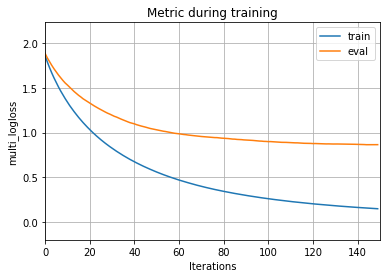

Plot feature importances...


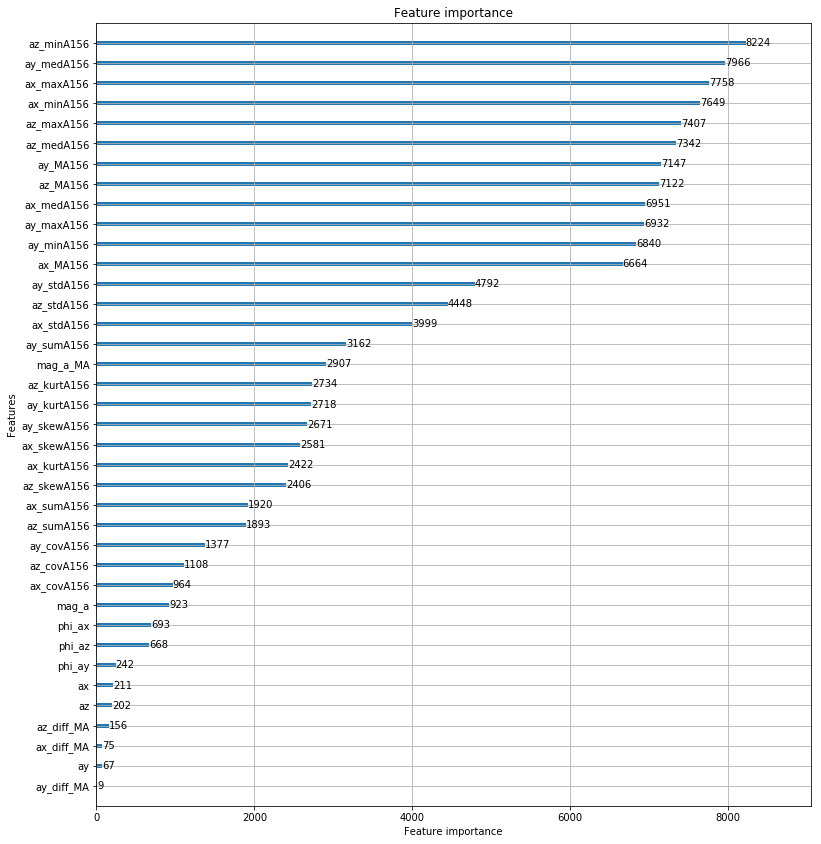

feature importance:
    1 az_minA156 : 8224
    2 ay_medA156 : 7966
    3 ax_maxA156 : 7758
    4 ax_minA156 : 7649
    5 az_maxA156 : 7407
    6 az_medA156 : 7342
    7 ay_MA156 : 7147
    8 az_MA156 : 7122
    9 ax_medA156 : 6951
    10 ay_maxA156 : 6932
    11 ay_minA156 : 6840
    12 ax_MA156 : 6664
    13 ay_stdA156 : 4792
    14 az_stdA156 : 4448
    15 ax_stdA156 : 3999
    16 ay_sumA156 : 3162
    17 mag_a_MA : 2907
    18 az_kurtA156 : 2734
    19 ay_kurtA156 : 2718
    20 ay_skewA156 : 2671
    21 ax_skewA156 : 2581
    22 ax_kurtA156 : 2422
    23 az_skewA156 : 2406
    24 ax_sumA156 : 1920
    25 az_sumA156 : 1893
    26 ay_covA156 : 1377
    27 az_covA156 : 1108
    28 ax_covA156 : 964
    29 mag_a : 923
    30 phi_ax : 693
    31 phi_az : 668
    32 phi_ay : 242
    33 ax : 211
    34 az : 202
    35 az_diff_MA : 156
    36 ax_diff_MA : 75
    37 ay : 67
    38 ay_diff_MA : 9
    39 ax_diff : 0
    40 ay_diff : 0
    41 az_diff : 0

CV : 1 

Plot metrics recorded during t

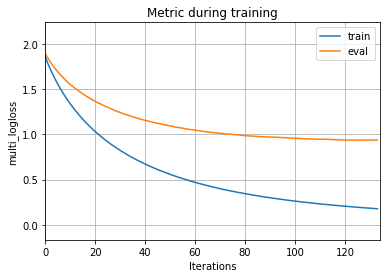

Plot feature importances...


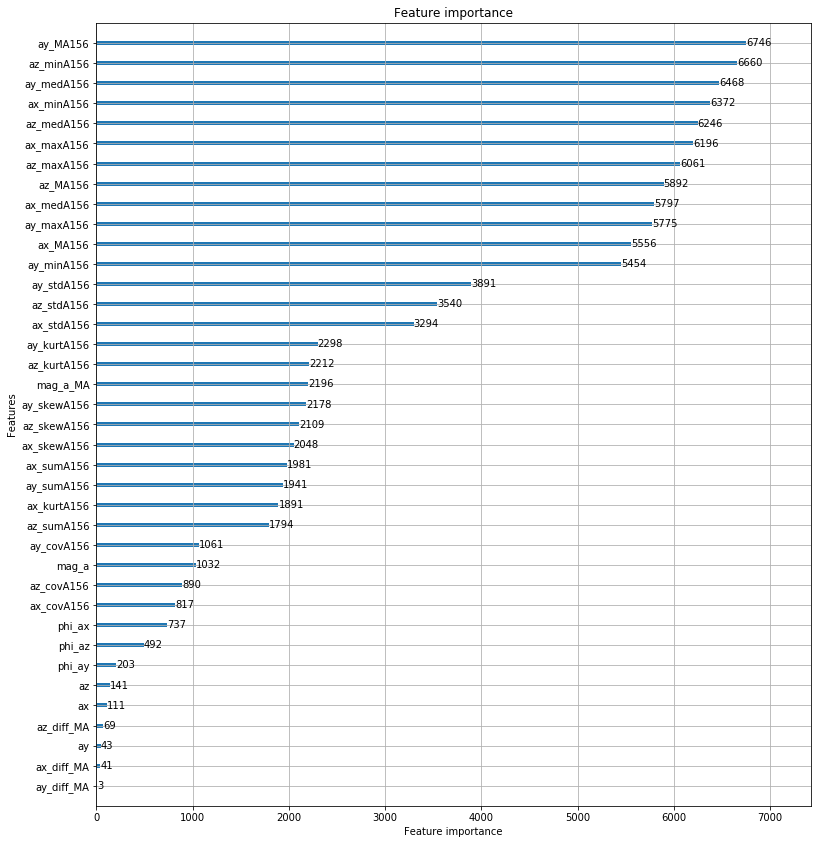

feature importance:
    1 ay_MA156 : 6746
    2 az_minA156 : 6660
    3 ay_medA156 : 6468
    4 ax_minA156 : 6372
    5 az_medA156 : 6246
    6 ax_maxA156 : 6196
    7 az_maxA156 : 6061
    8 az_MA156 : 5892
    9 ax_medA156 : 5797
    10 ay_maxA156 : 5775
    11 ax_MA156 : 5556
    12 ay_minA156 : 5454
    13 ay_stdA156 : 3891
    14 az_stdA156 : 3540
    15 ax_stdA156 : 3294
    16 ay_kurtA156 : 2298
    17 az_kurtA156 : 2212
    18 mag_a_MA : 2196
    19 ay_skewA156 : 2178
    20 az_skewA156 : 2109
    21 ax_skewA156 : 2048
    22 ax_sumA156 : 1981
    23 ay_sumA156 : 1941
    24 ax_kurtA156 : 1891
    25 az_sumA156 : 1794
    26 ay_covA156 : 1061
    27 mag_a : 1032
    28 az_covA156 : 890
    29 ax_covA156 : 817
    30 phi_ax : 737
    31 phi_az : 492
    32 phi_ay : 203
    33 az : 141
    34 ax : 111
    35 az_diff_MA : 69
    36 ay : 43
    37 ax_diff_MA : 41
    38 ay_diff_MA : 3
    39 ax_diff : 0
    40 ay_diff : 0
    41 az_diff : 0

CV : 2 

Plot metrics recorded during tr

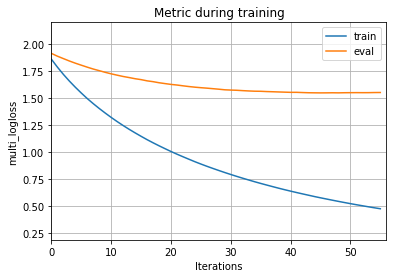

Plot feature importances...


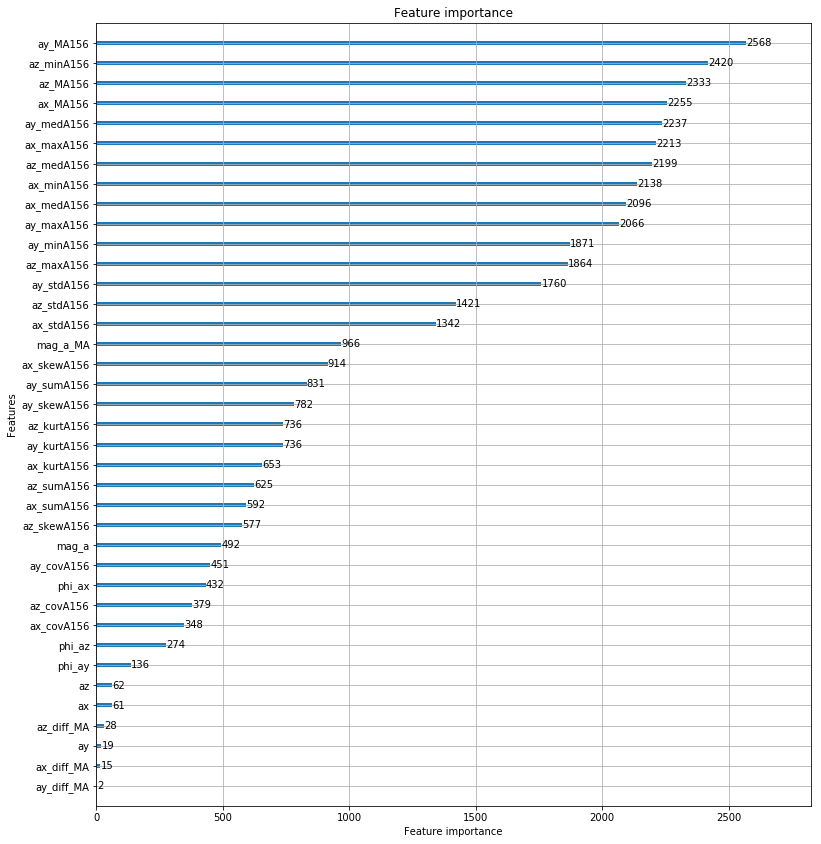

feature importance:
    1 ay_MA156 : 2568
    2 az_minA156 : 2420
    3 az_MA156 : 2333
    4 ax_MA156 : 2255
    5 ay_medA156 : 2237
    6 ax_maxA156 : 2213
    7 az_medA156 : 2199
    8 ax_minA156 : 2138
    9 ax_medA156 : 2096
    10 ay_maxA156 : 2066
    11 ay_minA156 : 1871
    12 az_maxA156 : 1864
    13 ay_stdA156 : 1760
    14 az_stdA156 : 1421
    15 ax_stdA156 : 1342
    16 mag_a_MA : 966
    17 ax_skewA156 : 914
    18 ay_sumA156 : 831
    19 ay_skewA156 : 782
    20 az_kurtA156 : 736
    21 ay_kurtA156 : 736
    22 ax_kurtA156 : 653
    23 az_sumA156 : 625
    24 ax_sumA156 : 592
    25 az_skewA156 : 577
    26 mag_a : 492
    27 ay_covA156 : 451
    28 phi_ax : 432
    29 az_covA156 : 379
    30 ax_covA156 : 348
    31 phi_az : 274
    32 phi_ay : 136
    33 az : 62
    34 ax : 61
    35 az_diff_MA : 28
    36 ay : 19
    37 ax_diff_MA : 15
    38 ay_diff_MA : 2
    39 ax_diff : 0
    40 ay_diff : 0
    41 az_diff : 0


In [16]:
for iCV in range(kFold_num):
    
    print('\nCV :',iCV,'\n')
        
    print('Plot metrics recorded during training...')
    ax = lgb.plot_metric(evals_result[iCV], metric='multi_logloss')
    # if(saveplots):plt.savefig(saveFolder+"/"+"lgb_plot_metric_"+saveName+".pdf")
    plt.show()

    print('Plot feature importances...')
    ax = lgb.plot_importance(lgb_model[iCV], max_num_features=x_val[iCV].shape[1])
    ax.figure.set_size_inches(6.4*2,4.8*3)
    # if(saveplots):plt.savefig(saveFolder+"/"+"lgb_plot_importance_"+saveName+".pdf")
    plt.show()

    print ('feature importance:')
    sorted_index = np.argsort(lgb_model[iCV].feature_importance())
    for i in range(len(lgb_model[iCV].feature_name())-1,0-1,-1):
        print (' '*3,(len(lgb_model[iCV].feature_name())-i), lgb_model[iCV].feature_name()[sorted_index[i]],':',lgb_model[iCV].feature_importance()[sorted_index[i]])

In [17]:
y_test_pred={}
for iCV in range(kFold_num):
    y_test_pred[iCV] = lgb_model[iCV].predict(x_test)

In [18]:
y_test_pred_mean = y_test_pred[0]
for i in range(1,kFold_num): y_test_pred_mean =+ y_test_pred[i]
y_test_pred_mean = y_test_pred_mean / kFold_num

In [19]:
y_test_pred_argmax = np.argmax(y_test_pred_mean, axis=1)

In [20]:
crosstab = pd.crosstab(y_test.values, y_test_pred_argmax,
                          rownames=['True'], colnames=['Predicted'],
                          margins=True)
crosstab

Predicted,1,2,3,4,5,6,7,All
True,,,,,,,,
1,32278,1286,17630,730,20,3282,67529,122755
2,3685,193,41,382,0,491,2043,6835
3,1343,833,3063,7034,250,1,16391,28915
4,529,956,1795,56358,390,0,4447,64475
5,0,61,550,6923,110,0,2676,10320
6,46,237,504,1276,3,0,1635,3701
7,1195,296,4661,4300,199,0,39588,50239
All,39076,3862,28244,77003,972,3774,134309,287240


[Text(0, 0.5, 'Working at Computer'),
 Text(0, 1.5, 'Standing Up, Walking and Going Up/Down stairs'),
 Text(0, 2.5, 'Standing'),
 Text(0, 3.5, 'Walking'),
 Text(0, 4.5, 'Going Up/Down Stairs'),
 Text(0, 5.5, 'Walking and Talking with Someone'),
 Text(0, 6.5, 'Talking while Standing')]

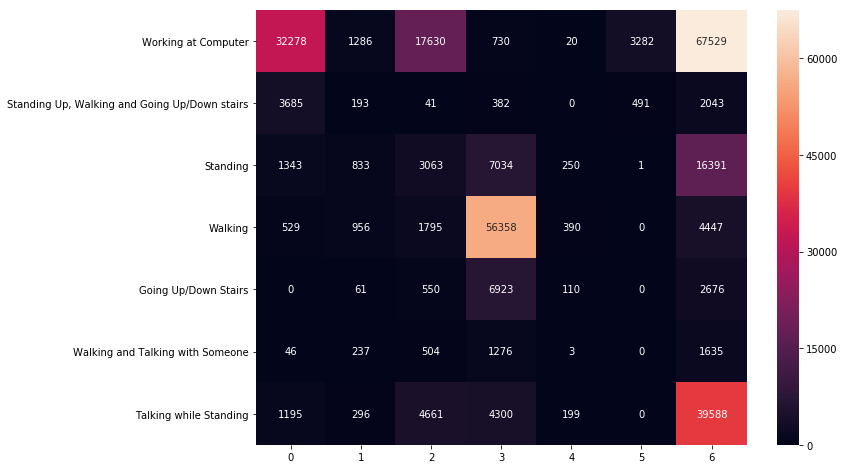

In [21]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.values, y_test_pred_argmax)

class_names = [class_dict[i] for i in range(1,8)]

import seaborn as sns
ax = sns.heatmap(cnf_matrix,annot=True,fmt="d")
ax.figure.set_size_inches(11,8)
# ax.set_xticklabels(class_names,rotation=45)
ax.set_yticklabels(class_names,rotation='horizontal')
